In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
raw_data = pd.read_csv("Fraud_check.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
raw_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
raw_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
raw_data.describe(include=np.object)

,Undergrad,Marital.Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


In [7]:
raw_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
raw_data.duplicated().sum()

0

In [9]:
raw_data.corr().style.background_gradient(cmap='coolwarm')

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [10]:
data=raw_data.copy()
data['Income_cat'] = pd.cut(x = raw_data['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income_cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


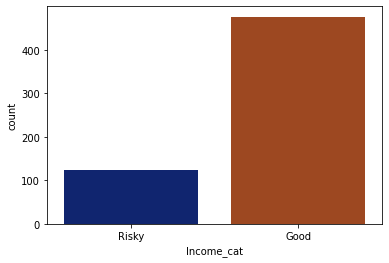

In [11]:
sns.countplot(data=data, x='Income_cat', palette = "dark")

In [12]:
data.drop('Taxable.Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban', 'Income_cat'], dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income_cat
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [14]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]
data.shape, X.shape, Y.columns

((600, 6), (600, 5), Index(['Income_cat'], dtype='object'))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7, stratify=Y)

In [17]:
rf_clf_1=RandomForestClassifier(n_estimators=100)
rf_clf_1.fit(X_train,Y_train)
Y_pred_1=rf_clf_1.predict(X_test)
Y_pred_train_1 = rf_clf_1.predict(X_train)

In [18]:
print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_1))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_1))
print(confusion_matrix(Y_test, Y_pred_1))
print(classification_report(Y_test, Y_pred_1))

Accuracy_train: 1.0
Accuracy_test: 0.7666666666666667
[[136   7]
 [ 35   2]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       143
           1       0.22      0.05      0.09        37

    accuracy                           0.77       180
   macro avg       0.51      0.50      0.48       180
weighted avg       0.68      0.77      0.71       180



In [19]:
feature_imp_1 = pd.Series(rf_clf_1.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_1

City.Population    0.527389
Work.Experience    0.323136
Marital.Status     0.069804
Undergrad          0.040468
Urban              0.039204
dtype: float64

In [20]:
rf_clf_2=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf_clf_2.fit(X_train,Y_train)
Y_pred_2=rf_clf_2.predict(X_test)
Y_pred_train_2 = rf_clf_2.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_2))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_2))
print(confusion_matrix(Y_test, Y_pred_2))
print(classification_report(Y_test, Y_pred_2))

Accuracy_train: 1.0
Accuracy_test: 0.7666666666666667
[[136   7]
 [ 35   2]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       143
           1       0.22      0.05      0.09        37

    accuracy                           0.77       180
   macro avg       0.51      0.50      0.48       180
weighted avg       0.68      0.77      0.71       180



In [21]:
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(Y_train)
print('Before',counter)

smt = SMOTE(random_state=7)
X_train_smt, Y_train_smt = smt.fit_resample(X_train, Y_train)

counter = Counter(Y_train_smt)
print('After',counter)

Before Counter({'Income_cat': 1})
After Counter({'Income_cat': 1})


In [22]:
X_train.shape, Y_train.shape, X_train_smt.shape, Y_train_smt.shape

((420, 5), (420, 1), (666, 5), (666, 1))

In [23]:
Y_train.value_counts(), Y_train_smt.value_counts()

(Income_cat
 0             333
 1              87
 dtype: int64, Income_cat
 0             333
 1             333
 dtype: int64)

In [24]:
rf_clf_3=RandomForestClassifier(n_estimators=400)
rf_clf_3.fit(X_train_smt,Y_train_smt)
Y_pred_3=rf_clf_3.predict(X_test)
Y_pred_train_3 = rf_clf_3.predict(X_train_smt)

print("Accuracy_train:",metrics.accuracy_score(Y_train_smt, Y_pred_train_3))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_3))
print(confusion_matrix(Y_test, Y_pred_3))
print(classification_report(Y_test, Y_pred_3))

Accuracy_train: 1.0
Accuracy_test: 0.6444444444444445
[[111  32]
 [ 32   5]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       143
           1       0.14      0.14      0.14        37

    accuracy                           0.64       180
   macro avg       0.46      0.46      0.46       180
weighted avg       0.64      0.64      0.64       180



In [25]:
grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [7]
}

In [26]:
from sklearn.model_selection import GridSearchCV

rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, Y_train)
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 7}

In [27]:
rf_clf_4=RandomForestClassifier(criterion= 'gini',
                                max_depth= 4,
                                max_features= 'sqrt',
                                n_estimators= 200,
                                random_state= 7)
rf_clf_4.fit(X_train,Y_train)
Y_pred_4=rf_clf_4.predict(X_test)
Y_pred_train_4 = rf_clf_4.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_4))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_4))
print(confusion_matrix(Y_test, Y_pred_4))
print(classification_report(Y_test, Y_pred_4))

Accuracy_train: 0.7952380952380952
Accuracy_test: 0.7944444444444444
[[143   0]
 [ 37   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



In [28]:
rf_clf_5=RandomForestClassifier(criterion= 'gini',
                                max_depth= 4,
                                max_features= 'sqrt',
                                n_estimators= 200,
                                random_state= 7)

rf_clf_5.fit(X_train_smt,Y_train_smt)
Y_pred_5=rf_clf_5.predict(X_test)
Y_pred_train_5 = rf_clf_5.predict(X_train_smt)

print("Accuracy_train:",metrics.accuracy_score(Y_train_smt, Y_pred_train_5))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_5))
print(confusion_matrix(Y_test, Y_pred_5))
print(classification_report(Y_test, Y_pred_5))

Accuracy_train: 0.7192192192192193
Accuracy_test: 0.5777777777777777
[[99 44]
 [32  5]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       143
           1       0.10      0.14      0.12        37

    accuracy                           0.58       180
   macro avg       0.43      0.41      0.42       180
weighted avg       0.62      0.58      0.60       180



In [29]:
scores = cross_val_score(rf_clf_4, X, Y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.00


In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

In [31]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train, Y_train)
rf_clf_6 = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = rf_clf_6, param_distributions = grid, n_iter =100, cv = cross_val,
                            verbose=2, random_state=42, n_jobs = -1,scoring='roc_auc')

clf_random.fit(X_train,Y_train)
Y_pred_6=clf_random.predict(X_test)
Y_pred_train_6 = clf_random.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_6))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_6))
print(confusion_matrix(Y_test, Y_pred_6))
print(classification_report(Y_test, Y_pred_6))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy_train: 0.7952380952380952
Accuracy_test: 0.7944444444444444
[[143   0]
 [ 37   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



In [32]:
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train, Y_train)
rf_clf_7 = RandomForestClassifier()
clf_grid = GridSearchCV(estimator = rf_clf_7, param_grid = grid, cv = cross_val,
                            verbose=2, n_jobs = -1,scoring='roc_auc')

clf_grid.fit(X_train,Y_train)
Y_pred_7=clf_grid.predict(X_test)
Y_pred_train_7 = clf_grid.predict(X_train)

print("Accuracy_train:",metrics.accuracy_score(Y_train, Y_pred_train_7))
print("Accuracy_test:",metrics.accuracy_score(Y_test, Y_pred_7))
print(confusion_matrix(Y_test, Y_pred_7))
print(classification_report(Y_test, Y_pred_7))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy_train: 0.7952380952380952
Accuracy_test: 0.7944444444444444
[[143   0]
 [ 37   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180

